In [1]:
import matplotlib.pyplot as plt
from numpy.random import randint, rand
import numpy as np

$7.22.ii)$

$P(X = x) = \frac{x^{-\alpha}}{Z}$

$Z = \sum_{k=1}^M k^{-\alpha}$

For the Zipf distribution (or any similar distribution with arbitrary probability $p$), the state space $S = \{1, 2, ..., M\}$

In [27]:
def Zipf(M, p=0.5, n=10**4, alpha=2, burn_in=1_000, init=10):
    """Sample from the Zipf distribution with exponent alpha on the set
    on the {1, 2, ..., M} using Metropolis-Hastings and the symmetric
    random-walk proposal

    Note that the target distribution is given by P(X = x) = (x**-alpha) / Z
    where Z = \sum_{k=1}^M k^{-\alpha}
    """

    def Bernoulli(p_):          # Draw from Bernoulli(p)
        return rand(1)[0] <= p_

    t = 0                       # Initialize t
    y = np.empty(n + burn_in)   # Initialize y

    y[0] = init

    while t < n + burn_in - 1:
        proposal = min(max(1, y[t] + (-1)**Bernoulli(p)), M)
        accept_prob = (y[t]**alpha) / (proposal**alpha)
        
        if Bernoulli(accept_prob):  # Proposal accepted
            y[t+1] = proposal
        else:
            y[t+1] = y[t]

        t += 1

    # return only samples taken after the burn in period
    return y[burn_in:]


def get_Zipf(M, alpha):
    """Given M and alpha, return the associated Zipf function"""
    
    # total value to normalize probabilities
    Z = ((1 + np.arange(M, dtype=np.float32))**-alpha).sum()
    
    def Zipf_true(x):
        return (float(x)**-alpha) / Z
    
    return np.vectorize(Zipf_true)

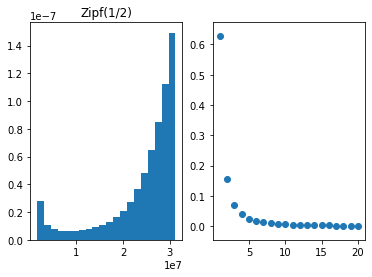

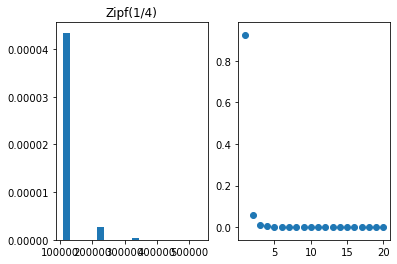

In [30]:
# 7.11.iii
for k in [1, 2, 3, 4]:
    
    # Zipf Params
    prob  = k / 5
    n     = 10**5
    alpha = 2
    M     = 20     # bins
    burn_in = 10_000
    
    # take n - burn_in samples from the Zipf(prob) distribution
    samples = Zipf(M, prob, n, alpha, burn_in)
    samples *= samples.sum()
    
    # plot a normed histogram of the resulting samples
    fig, axes = plt.subplots(1, 2)
    
    # plot samples
    axes[0].hist(samples, density=True, bins=20)
    axes[0].set_title(f'Zipf(1/{k})')
    
    # plot true zipf pmf
    zipf_true = get_Zipf(M, k)
    domain = np.arange(M) + 1
    axes[1].scatter(domain, zipf_true(domain))
    plt.show()